In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, Markdown, HTML
from matplotlib.animation import FuncAnimation

In [2]:
df = pd.DataFrame()

temps = [0.2, 0.7]
types = ['classical','quantum']
for temp in temps:
    for t in types:
        df_temp = pd.read_csv(f'./data/df_{t}_T0{int(temp*10)}.csv', sep=';', decimal=',')
        df_temp['T'] = temp
        df_temp['type'] = t
        df = pd.concat([df,df_temp])

        
df = df.reset_index(drop=True)
df.head()

,simulation,output,similarity,length,answer_relevancy,faithfulness,hallucination,correctness,T,type
0,1,"Fotosynteza to proces, w którym rośliny produk...",0.766514,82,NaN,NaN,NaN,NaN,0.2,classical
1,2,"Fotosynteza to taki specjalny sposób, w jaki r...",0.727671,90,NaN,NaN,NaN,NaN,0.2,classical
2,3,"Fotosynteza to taki specjalny proces, który dz...",0.736838,120,NaN,NaN,NaN,NaN,0.2,classical
3,4,Oczywiście! Fotosynteza to taki specjalny proc...,0.795583,79,NaN,NaN,NaN,NaN,0.2,classical
4,5,"Fotosynteza to proces, dzięki któremu rośliny ...",0.755934,105,NaN,NaN,NaN,NaN,0.2,classical


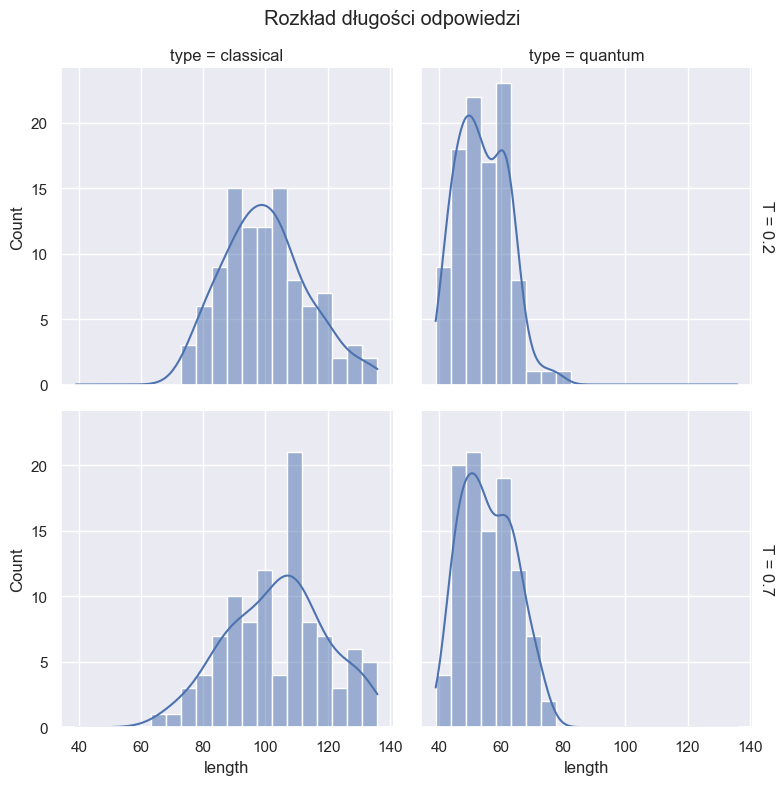

In [3]:
sns.set_theme(style="darkgrid")
dp = sns.displot(df, x="length", col="type", row="T", facet_kws=dict(margin_titles=True), height=4, kind='hist', bins=20, kde=True)
dp.fig.suptitle('Rozkład długości odpowiedzi')
dp.fig.tight_layout()
plt.show()

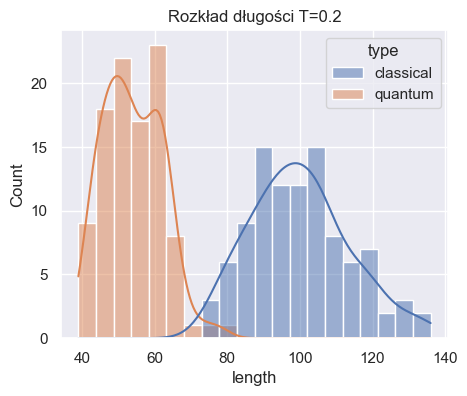

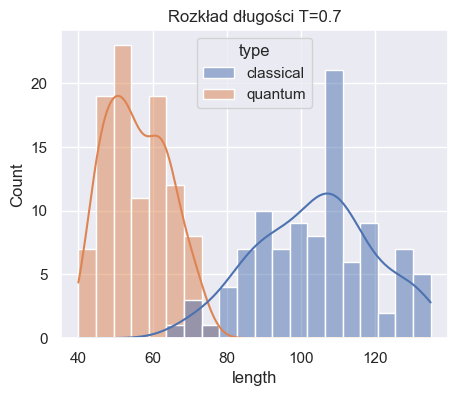

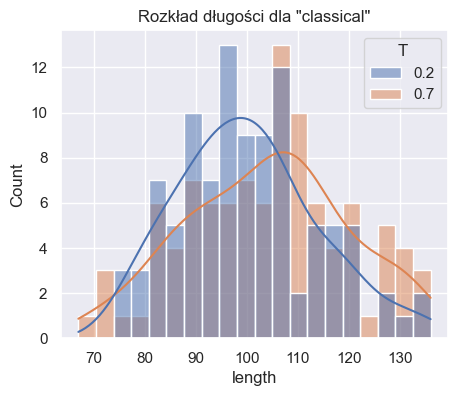

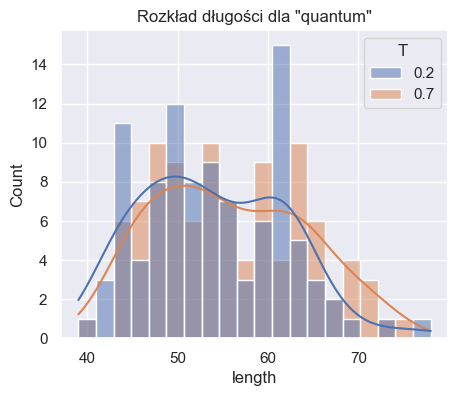

In [31]:
for T in temps:
    plt.figure(figsize=(5,4))
    sns.histplot(data=df[df['T']==T], x='length', hue='type', kde=True, bins=20)
    plt.title(f'Rozkład długości T={T}')
    plt.show()
for t in types:
    plt.figure(figsize=(5,4))
    sns.histplot(data=df[df['type']==t], x='length', hue='T', kde=True, bins=20, palette='deep')
    plt.title(f'Rozkład długości dla "{t}"')
    plt.show()    

In [93]:
df.groupby(by=['type','T']).agg({'length':['var','min','max','std','median','mean']}).reset_index()

type    T      length                                   
                          var min  max        std median    mean
0  classical  0.2  181.823333  76  136  13.484188   99.0  100.07
1  classical  0.7  248.838283  67  135  15.774609  106.0  103.99
2    quantum  0.2   63.696566  39   78   7.981013   54.0   53.98
3    quantum  0.7   70.580202  40   75   8.401202   55.0   55.84

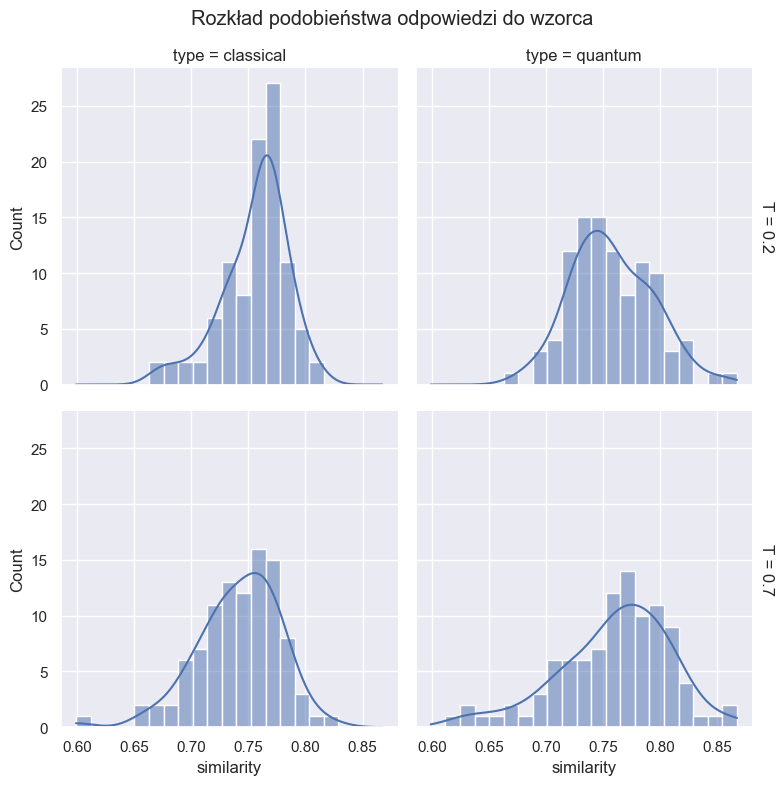

In [ ]:
sns.set_theme(style="darkgrid")
dp = sns.displot(df, x="similarity", col="type", row="T", facet_kws=dict(margin_titles=True), height=4, kind='hist', kde=True)
dp.fig.suptitle('Rozkład podobieństwa odpowiedzi do wzorca')
dp.fig.tight_layout()
plt.show()

In [48]:
df.groupby(by=['type','T']).agg({'similarity':['var','min','max','std','median','mean']}).reset_index()

type    T similarity                                                  
                         var       min       max       std    median      mean
0  classical  0.2   0.000830  0.667368  0.811585  0.028804  0.762267  0.755841
1  classical  0.7   0.001316  0.598909  0.824070  0.036278  0.745919  0.741252
2    quantum  0.2   0.001259  0.673302  0.858259  0.035481  0.752463  0.757243
3    quantum  0.7   0.002367  0.622211  0.867247  0.048647  0.765946  0.760013

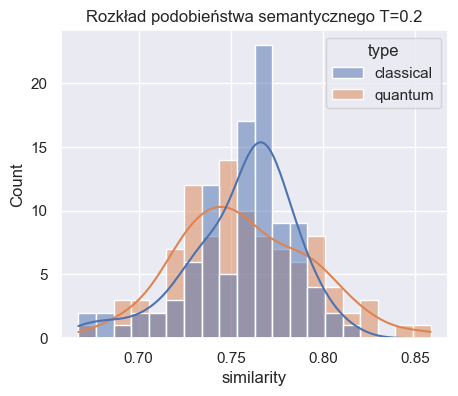

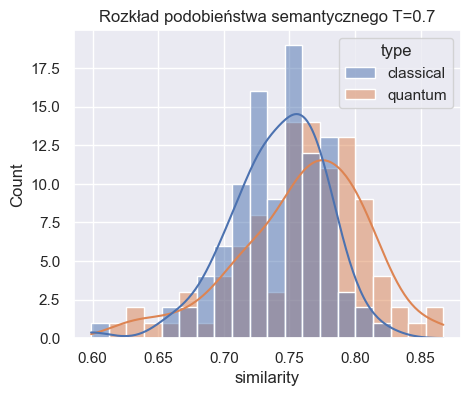

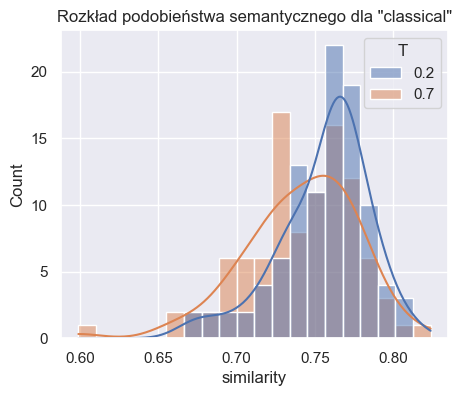

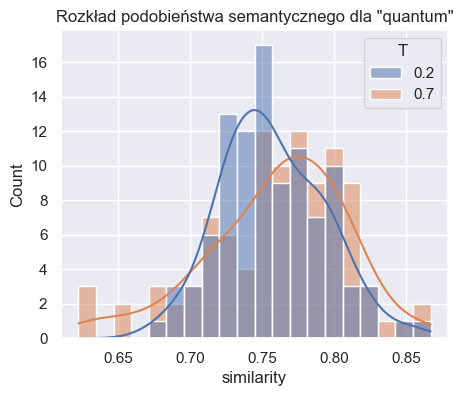

In [ ]:
for T in temps:
    plt.figure(figsize=(5,4))
    sns.histplot(data=df[df['T']==T], x='similarity', hue='type', kde=True, bins=20)
    plt.title(f'Rozkład podobieństwa semantycznego T={T}')
    plt.show()
for t in types:
    plt.figure(figsize=(5,4))
    sns.histplot(data=df[df['type']==t], x='similarity', hue='T', kde=True, bins=20, palette='deep')
    plt.title(f'Rozkład podobieństwa semantycznego dla "{t}"')
    plt.show()    

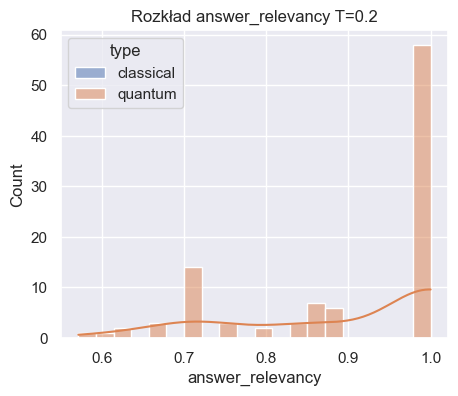

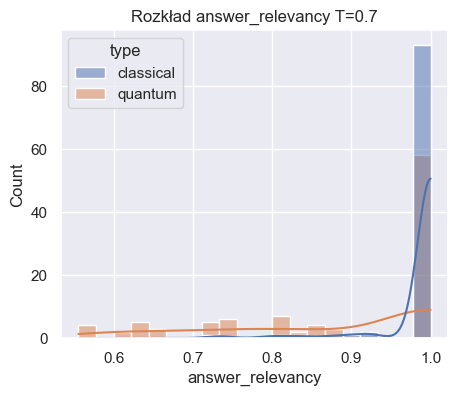

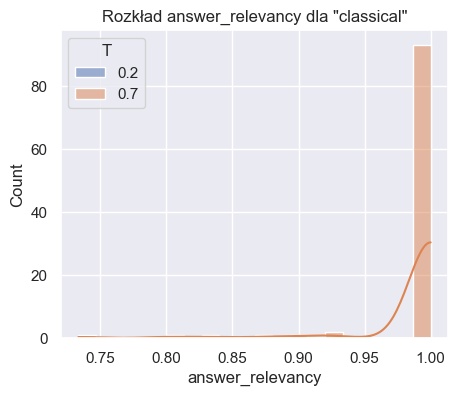

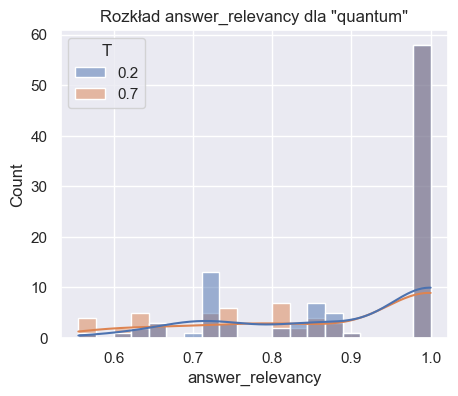

type    T answer_relevancy                                          
                               var       min  max       std median      mean
0  classical  0.2              NaN       NaN  NaN       NaN    NaN       NaN
1  classical  0.7         0.001678  0.733333  1.0  0.040961    1.0  0.989878
2    quantum  0.2         0.017150  0.571429  1.0  0.130958    1.0  0.900210
3    quantum  0.7         0.021456  0.555556  1.0  0.146478    1.0  0.888936

In [63]:
for T in temps:
    plt.figure(figsize=(5,4))
    sns.histplot(data=df[df['T']==T], x='answer_relevancy', hue='type', kde=True, bins=20)
    plt.title(f'Rozkład answer_relevancy T={T}')
    plt.show()
for t in types:
    plt.figure(figsize=(5,4))
    sns.histplot(data=df[df['type']==t], x='answer_relevancy', hue='T', kde=True, bins=20, palette='deep')
    plt.title(f'Rozkład answer_relevancy dla "{t}"')
    plt.show()
df.groupby(by=['type','T']).agg({'answer_relevancy':['var','min','max','std','median','mean']}).reset_index()    

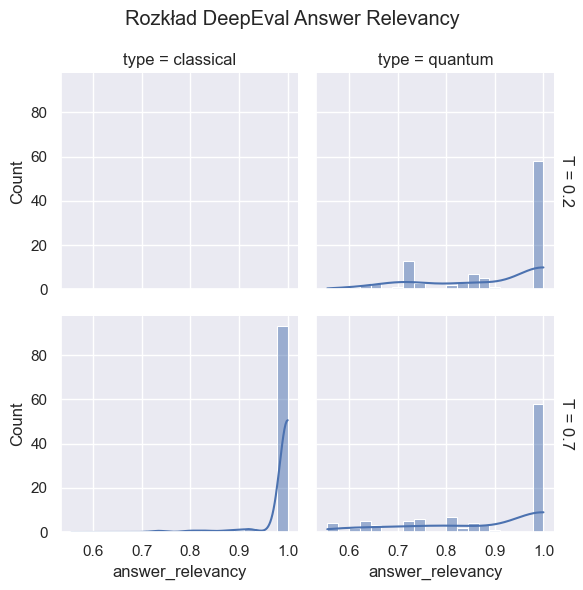

In [95]:
sns.set_theme(style="darkgrid")
dp = sns.displot(df, x="answer_relevancy", col="type", row="T", facet_kws=dict(margin_titles=True), height=3, kind='hist', bins=20, kde=True)
dp.fig.suptitle('Rozkład DeepEval Answer Relevancy')
dp.fig.tight_layout()
plt.show()

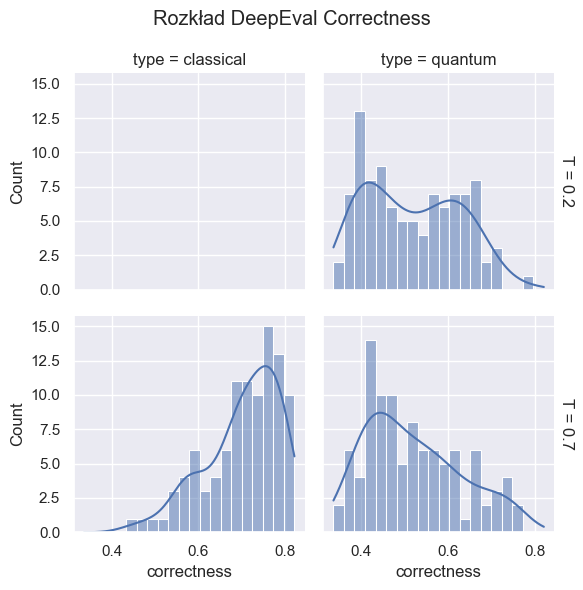

In [96]:
sns.set_theme(style="darkgrid")
dp = sns.displot(df, x="correctness", col="type", row="T", facet_kws=dict(margin_titles=True), height=3, kind='hist', bins=20, kde=True)
dp.fig.suptitle('Rozkład DeepEval Correctness')
dp.fig.tight_layout()
plt.show()

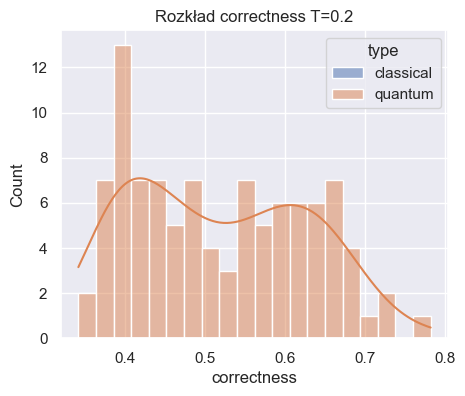

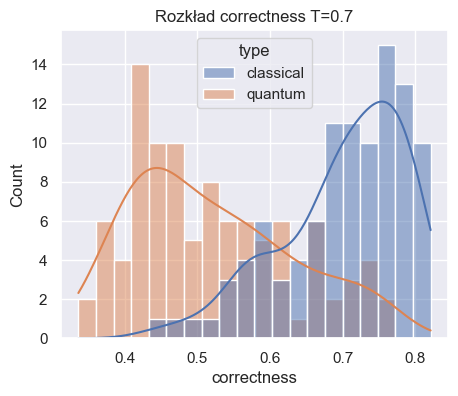

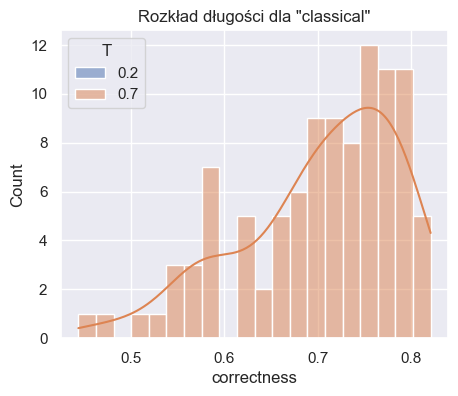

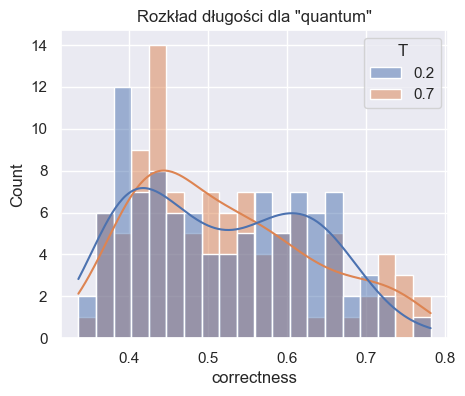

type    T correctness                                          \
                          var       min       max       std    median   
0  classical  0.2         NaN       NaN       NaN       NaN       NaN   
1  classical  0.7    0.007137  0.443512  0.821222  0.084480  0.716679   
2    quantum  0.2    0.011815  0.341279  0.781990  0.108699  0.507041   
3    quantum  0.7    0.012096  0.336358  0.762251  0.109982  0.504186   

             
       mean  
0       NaN  
1  0.702267  
2  0.518091  
3  0.520833

In [62]:
for T in temps:
    plt.figure(figsize=(5,4))
    sns.histplot(data=df[df['T']==T], x='correctness', hue='type', kde=True, bins=20)
    plt.title(f'Rozkład correctness T={T}')
    plt.show()
for t in types:
    plt.figure(figsize=(5,4))
    sns.histplot(data=df[df['type']==t], x='correctness', hue='T', kde=True, bins=20, palette='deep')
    plt.title(f'Rozkład długości dla "{t}"')
    plt.show()
df.groupby(by=['type','T']).agg({'correctness':['var','min','max','std','median','mean']}).reset_index()    

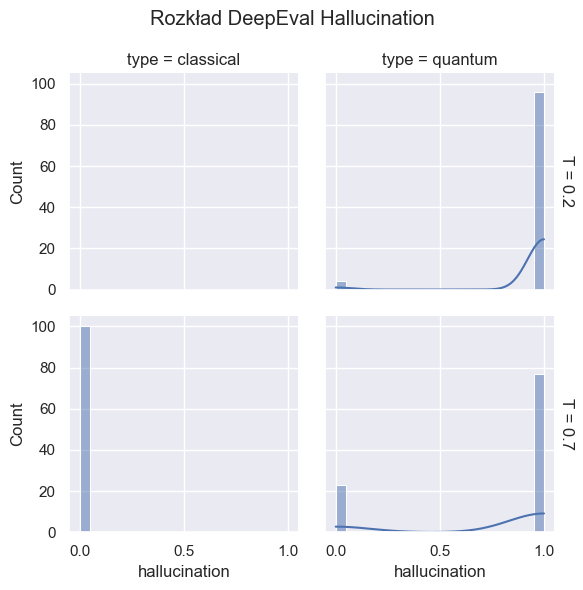

In [97]:
sns.set_theme(style="darkgrid")
dp = sns.displot(df, x="hallucination", col="type", row="T", facet_kws=dict(margin_titles=True), height=3, kind='hist', bins=20, kde=True)
dp.fig.suptitle('Rozkład DeepEval Hallucination')
dp.fig.tight_layout()
plt.show()

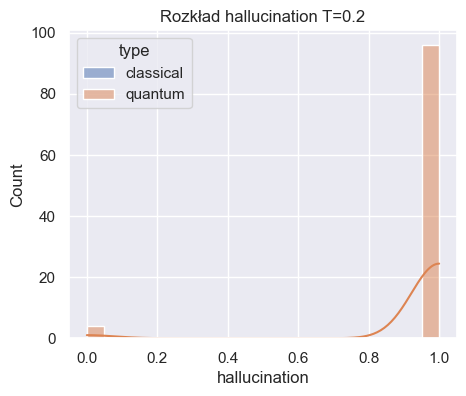

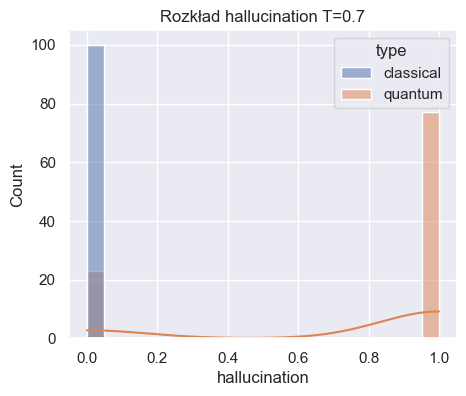

In [77]:
for T in temps:
    plt.figure(figsize=(5,4))
    sns.histplot(data=df[df['T']==T], x='hallucination', hue='type', kde=True, bins=20)
    plt.title(f'Rozkład hallucination T={T}')
    plt.show()

In [87]:
df.groupby(by=['type','T']).agg({'hallucination':['var','min','max','std','median','mean']}).reset_index()    

type    T hallucination                                 
                            var  min  max       std median  mean
0  classical  0.2           NaN  NaN  NaN       NaN    NaN   NaN
1  classical  0.7      0.000000  0.0  0.0  0.000000    0.0  0.00
2    quantum  0.2      0.038788  0.0  1.0  0.196946    1.0  0.96
3    quantum  0.7      0.178889  0.0  1.0  0.422953    1.0  0.77

In [92]:
df.groupby(by=['type','T','hallucination']).size().to_frame('count').reset_index()

,type,T,hallucination,count
0,classical,0.7,0.0,100
1,quantum,0.2,0.0,4
2,quantum,0.2,1.0,96
3,quantum,0.7,0.0,23
4,quantum,0.7,1.0,77
